<h1></h1>
<h1 align = center><b>Goldsmiths University of London</b><h1>
<h4 align = center><b>Team Leader:</b> Rizza Marata (rmara001)<br><b>Student ID:</b> 33727980</b><h1>
<h4 align = center><b>Team Member:</b> Reena Maratas (rmara002)<br><b>Student ID: </b>33727927</b><h1>

***

<h1 align = center><b>Data Mining Assignment - Part 1</b><h1>

This assignment represents 100% of the Data Mining module’s mark. It is composed of Part 1 which is worth 40 marks, and Part 2 which is worth 60 marks. You can work in a team of 2 students for this assignment. One student per team will be chosen by the team as being the team leader – who will be in charge of coordinating the team’s work, and of submitting the assignment in their account on VLE on behalf of all the team.
<br></br><br>
<b> PART 1: </b>

This task is based on the Sonar real data seen previously in class. Several objects which can be rock or metal cylinders are scanned on different angles and under different conditions, with sonar signals. 60 measurements are recorded per columns for each object (one record per object) and these are the predictors called A1, A2, …, A60. The label associated with each record contains the letter "R" if the object is a rock and "M" if it is metal cylinder, and this is the outcome variable called Class.

Two datasets are provided to you: a training dataset in the sonar_train.csv file, and a test dataset in the sonar_test.csv file.
<br></br>
<b>a)</b>  You are required to write a Python code implementing the simple Nearest Neighbour algorithm, with the Minkowski distance, both discussed in lecture of week 1. You should not implement k-Nearest Neighbour, for an arbitrary number of neighbours k. Your code will read the power q appearing in the Mionkowski distance, and will classify each record from the test dataset based on the training dataset. Remember, to classify a record from the test set you need to find its nearest neighbour in the training set (this is the one which minimizes the distance to the test set record); take the class of the nearest neighbour as the predicted class for the test set record. After classifying all the records in the test set, your code needs to calculate and display the accuracy, recall, precision, and F1 measure with respect to the class "M" (which is assumed to be the positive class), of the predictions on the test dataset. Run your code to produce results for Manhattan and for Euclidian distances, which are particular cases of Minkowski's distance.
<br></br>
<b>b)</b>  Run your code for the power q as a positive integer number from 1 to 20 and display the accuracy, recall, precision, and F1 measure on the test set in a chart. Which value of q leads to the best accuracy on the test set?

The code, comments, explanations and results will be provided in a Jupyter notebook called Part1.

Note that in this task you are not to apply a library for the nearest neighbour algorithm, but you are required to compute the distances, find the nearest neighbour, and so code yourself this simple algorithm.

## **I. Utilise Libraries and Packages**

In [ ]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical computing
import numpy as np

# Import the pyplot module from matplotlib library for creating static, interactive, and animated visualisations in Python
import matplotlib.pyplot as plt

# Import four functions from the sklearn.metrics module of the scikit-learn library
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

## **II. Examining and Visualising Data**

### **a.)** Downloading the data

In [ ]:
# Download the test dataset from GitHub raw URL using wget command
!wget https://raw.githubusercontent.com/rmara001/Data-Mining-Assignment/main/data/sonar_test.csv

# Download the training dataset from GitHub raw URL using wget command
!wget https://raw.githubusercontent.com/rmara001/Data-Mining-Assignment/main/data/sonar_train.csv

--2024-04-05 01:29:28--  https://raw.githubusercontent.com/rmara001/Data-Mining-Assignment/main/data/sonar_test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28819 (28K) [text/plain]
Saving to: ‘sonar_test.csv.1’

sonar_test.csv.1    100%[===================>]  28.14K  --.-KB/s    in 0.001s  

2024-04-05 01:29:28 (45.4 MB/s) - ‘sonar_test.csv.1’ saved [28819/28819]

--2024-04-05 01:29:28--  https://raw.githubusercontent.com/rmara001/Data-Mining-Assignment/main/data/sonar_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

### **b.)** Loading the data

In [ ]:
# Load the downloaded training and test datasets into pandas dataframes

# Load training data
sonar_train_df = pd.read_csv('sonar_train.csv')

# Load test data
sonar_test_df = pd.read_csv('sonar_test.csv')

### **c.)** Examining the structure of the data

In [ ]:
# Display initial data insights

# Show the first 5 rows of the training dataset to provide a snapshot of the data structure.
# For a quick inspection of the data, to help understand the format and types of data we are working with.
print("Training Dataframe:")
display(sonar_train_df.head())

# This prints a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# Show the first 5 rows of the testing dataset.
# To check for consistency with the training set and readiness for analysis.
print("Testing Dataframe:")
display(sonar_test_df.head())

Training Dataframe:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032,R
1,0.0599,0.0474,0.0498,0.0387,0.1026,0.0773,0.0853,0.0447,0.1094,0.0351,...,0.0013,0.0005,0.0227,0.0209,0.0081,0.0117,0.0114,0.0112,0.0100,M
2,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,R
3,0.0151,0.0320,0.0599,0.1050,0.1163,0.1734,0.1679,0.1119,0.0889,0.1205,...,0.0061,0.0015,0.0084,0.0128,0.0054,0.0011,0.0019,0.0023,0.0062,R
4,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R



----------------------------------------

Testing Dataframe:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,Class
0,0.0125,0.0152,0.0218,0.0175,0.0362,0.0696,0.0873,0.0616,0.1252,0.1302,...,0.0041,0.0074,0.0030,0.0050,0.0048,0.0017,0.0041,0.0086,0.0058,R
1,0.0530,0.0885,0.1997,0.2604,0.3225,0.2247,0.0617,0.2287,0.0950,0.0740,...,0.0244,0.0199,0.0257,0.0082,0.0151,0.0171,0.0146,0.0134,0.0056,M
2,0.0368,0.0279,0.0103,0.0566,0.0759,0.0679,0.0970,0.1473,0.2164,0.2544,...,0.0105,0.0024,0.0018,0.0057,0.0092,0.0009,0.0086,0.0110,0.0052,M
3,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R
4,0.0216,0.0124,0.0174,0.0152,0.0608,0.1026,0.1139,0.0877,0.1160,0.0866,...,0.0052,0.0049,0.0096,0.0134,0.0122,0.0047,0.0018,0.0006,0.0023,R


In [ ]:
# Inspecting Dataframe Structures

# Summarise and show the training dataframe to evaluate its structure, detect missing values, and guide preprocessing
print("Training Dataframe Info:")
sonar_train_df.info()

# This prints a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# Summarise and show the testing dataframe to ensure compatibility with the training set for accurate evaluation
print("Testing Dataframe Info:")
sonar_test_df.info()

Training Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      139 non-null    float64
 1   A2      139 non-null    float64
 2   A3      139 non-null    float64
 3   A4      139 non-null    float64
 4   A5      139 non-null    float64
 5   A6      139 non-null    float64
 6   A7      139 non-null    float64
 7   A8      139 non-null    float64
 8   A9      139 non-null    float64
 9   A10     139 non-null    float64
 10  A11     139 non-null    float64
 11  A12     139 non-null    float64
 12  A13     139 non-null    float64
 13  A14     139 non-null    float64
 14  A15     139 non-null    float64
 15  A16     139 non-null    float64
 16  A17     139 non-null    float64
 17  A18     139 non-null    float64
 18  A19     139 non-null    float64
 19  A20     139 non-null    float64
 20  A21     139 non-null    float64
 21  A22     139 no

In [ ]:
# Summarising Data Statistics

# Show the training data's statistical summary to assess distribution, identify outliers, and check for imbalance
print("Training Dataframe Statistical Summary:")
display(sonar_train_df.describe())

# This prints a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# Show the testing data's statistics to evaluate its alignment with the training data for a balanced model assessment
print("Testing Dataframe Statistical Summary:")
display(sonar_test_df.describe())


Training Dataframe Statistical Summary:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,...,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,0.028881,0.037319,0.041682,0.052694,0.075263,0.105000,0.123863,0.132810,0.175160,0.205400,...,0.016472,0.013347,0.010170,0.010484,0.009495,0.008061,0.007673,0.008077,0.007858,0.006549
std,0.022602,0.033011,0.038513,0.047588,0.056174,0.057755,0.061604,0.087889,0.120416,0.126882,...,0.012275,0.010252,0.007068,0.006864,0.007135,0.006076,0.005402,0.006803,0.006001,0.004598
min,0.001500,0.001700,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.019300,...,0.001500,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000600,0.000100,0.000600
25%,0.013150,0.015800,0.017050,0.024400,0.039200,0.071950,0.086800,0.082650,0.094000,0.110300,...,0.008700,0.006800,0.004650,0.005350,0.004100,0.003950,0.003700,0.003550,0.003550,0.003100
50%,0.022100,0.029700,0.032400,0.041500,0.061700,0.092900,0.105300,0.111700,0.152200,0.183800,...,0.014000,0.011300,0.008400,0.008900,0.007900,0.006400,0.006200,0.005800,0.006500,0.005400
75%,0.035250,0.047550,0.055600,0.062700,0.101050,0.132550,0.160700,0.167600,0.226500,0.269000,...,0.020800,0.016450,0.013550,0.013500,0.012100,0.010150,0.010350,0.010650,0.010050,0.008750
max,0.131300,0.233900,0.305900,0.426400,0.401000,0.307000,0.332200,0.459000,0.682800,0.596600,...,0.100400,0.070900,0.036100,0.035200,0.044700,0.039400,0.035500,0.044000,0.029400,0.023100



----------------------------------------

Testing Dataframe Statistical Summary:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.029733,0.040687,0.048164,0.056306,0.075080,0.103704,0.117483,0.138806,0.183730,0.214019,...,0.015257,0.013567,0.011796,0.011861,0.008878,0.008545,0.008117,0.007691,0.008110,0.006423
std,0.023914,0.032982,0.038167,0.044557,0.054684,0.062161,0.062389,0.079825,0.114841,0.149259,...,0.011498,0.008319,0.006969,0.008084,0.007025,0.005007,0.006523,0.005780,0.006573,0.005842
min,0.003900,0.000600,0.002600,0.006200,0.007600,0.020100,0.014500,0.009800,0.032300,0.011300,...,0.000000,0.002700,0.002300,0.001300,0.001100,0.000800,0.000900,0.000300,0.000200,0.000700
25%,0.016200,0.017200,0.021800,0.024400,0.035100,0.061200,0.072300,0.076800,0.106300,0.118500,...,0.007600,0.007800,0.006300,0.005500,0.004300,0.004900,0.003800,0.003600,0.004000,0.003000
50%,0.023500,0.035100,0.038000,0.044500,0.064500,0.086300,0.111000,0.117600,0.157100,0.180600,...,0.013700,0.011500,0.011200,0.010000,0.006500,0.007300,0.005600,0.006200,0.006100,0.005300
75%,0.036300,0.052300,0.062300,0.070700,0.097400,0.135400,0.148700,0.192700,0.242300,0.266800,...,0.020800,0.017200,0.016300,0.015900,0.011000,0.011600,0.011000,0.010200,0.010700,0.008500
max,0.137100,0.163200,0.199700,0.260400,0.322500,0.382300,0.372900,0.377100,0.566400,0.710600,...,0.079800,0.038600,0.039000,0.034400,0.037600,0.024900,0.031600,0.032100,0.036400,0.043900


In [ ]:
# Evaluating Dataset Dimensions

# Display the shape of the training dataframe to understand the scale of our training dataset
print(f"Shape of Training Dataframe: {sonar_train_df.shape}")

# This prints a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# Display the shape of the testing dataframe
print(f"Shape of Testing Dataframe: {sonar_test_df.shape}")

Shape of Training Dataframe: (139, 61)

----------------------------------------

Shape of Testing Dataframe: (69, 61)


### **d.)** Data Type Overview

In [ ]:
# Display the data types of each column in the training dataframe
print("Training Dataframe Column Types:")
print(sonar_train_df.dtypes)

# This prints a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# Display the data types of each column in the testing dataframe
print("Testing Dataframe Column Types:")
print(sonar_test_df.dtypes)

Training Dataframe Column Types:
A1       float64
A2       float64
A3       float64
A4       float64
A5       float64
          ...   
A57      float64
A58      float64
A59      float64
A60      float64
Class     object
Length: 61, dtype: object

----------------------------------------

Testing Dataframe Column Types:
A1       float64
A2       float64
A3       float64
A4       float64
A5       float64
          ...   
A57      float64
A58      float64
A59      float64
A60      float64
Class     object
Length: 61, dtype: object


## **III. Data Cleaning**

### **a.)** Checking if there are any missing values in the data

In [ ]:
# Function to check and report any missing values in dataframes
def check_missing_values(df, df_name):
    """
    Checks, prints the missing values, and indicates if any missing values are present in a dataframe.

    Parameters:
    - df: pandas dataframe to check for missing values.
    - df_name: String, name of the dataframe for display purposes.
    """
    missing_values = df.isnull().sum()
    # Check if there are any missing values in the dataframe
    any_missing = df.isnull().any().any()

    print(f"Missing values in {df_name}:")
    print(missing_values)
    print(f"\nAre there any missing values in {df_name}: {any_missing}")

# Check for missing values in the training dataframe
check_missing_values(sonar_train_df, "Training Dataframe")

# This prints a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# Check for missing values in the testing dataframe
check_missing_values(sonar_test_df, "Testing Dataframe")

Missing values in Training Dataframe:
A1       0
A2       0
A3       0
A4       0
A5       0
        ..
A57      0
A58      0
A59      0
A60      0
Class    0
Length: 61, dtype: int64

Are there any missing values in Training Dataframe: False

----------------------------------------

Missing values in Testing Dataframe:
A1       0
A2       0
A3       0
A4       0
A5       0
        ..
A57      0
A58      0
A59      0
A60      0
Class    0
Length: 61, dtype: int64

Are there any missing values in Testing Dataframe: False


## **IV. Distance Calculation and Nearest Neighbor Classification**

### **a.)** Minkowski Distance Calculation

In [ ]:
# Define the Minkowski distance function
def minkowski_distance(x1, x2, q):
    return np.sum(np.abs(x1 - x2) ** q) ** (1 / q)

### **b.)** Nearest Neighbour Classification

In [ ]:
# Classify each record in the test dataset based on its nearest neighbour from the training dataset using the Minkowski distance
def classify_nearest_neighbour(train_df, test_df, q):
    """
    Classifies each record in the test dataset based on the nearest neighbour from the training dataset
    using Minkowski distance with a power parameter q.

    Returns:
        predictions (list): The list of predicted labels for the test dataset.
    """
    predictions = []
    for i, test_row in test_df.drop(columns=['Class']).iterrows():
        # Calculate Minkowski distance between the test record and all training records
        distances = train_df.apply(lambda row: minkowski_distance(test_row[:-1], row[:-1], q), axis=1)
        # Find the nearest neighbour
        nearest_neighbour_index = distances.idxmin()
        # Predict the class of the nearest neighbour
        predicted_class = train_df.iloc[nearest_neighbour_index, -1]
        predictions.append(predicted_class)
    return predictions

## **V. Evaluation Metrics Calculation**

### **a.)** Define function to calculate and display evaluation metrics

In [ ]:
# Evaluate and print the classification metrics
def evaluate_metrics(test_labels, predictions):
    """
    Evaluates and returns the classification metrics: accuracy, recall, precision, and F1 score for the class 'M'.
    Args:
        test_labels (pd.Series): Actual labels from the test dataset.
        predictions (list): Predicted labels for the test dataset.
    Returns:
        dict: A dictionary containing the metrics.
    """
    accuracy = accuracy_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions, pos_label='M')
    precision = precision_score(test_labels, predictions, pos_label='M')
    f1 = f1_score(test_labels, predictions, pos_label='M')

    metrics = {
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision,
        'f1': f1
    }

    return metrics

### **b.)** Metrics Evaluation for Manhattan and Euclidean Distances

In [ ]:
# For Manhattan distance (q=1)
predictions_manhattan = classify_nearest_neighbour(sonar_train_df, sonar_test_df, q=1)
manhattan_metrics = evaluate_metrics(sonar_test_df['Class'], predictions_manhattan)
print("Metrics for Manhattan distance (q = 1):")
print(f"Accuracy: {manhattan_metrics['accuracy']:}")
print(f"Recall: {manhattan_metrics['recall']:}")
print(f"Precision: {manhattan_metrics['precision']:}")
print(f"F1 Score: {manhattan_metrics['f1']:}")

# This prints a line break with a separator for clarity
print("\n" + "-"*40 + "\n")

# For Euclidean distance (q=2)
predictions_euclidean = classify_nearest_neighbour(sonar_train_df, sonar_test_df, q=2)
euclidean_metrics = evaluate_metrics(sonar_test_df['Class'], predictions_euclidean)
print("Metrics for Euclidean distance (q = 2):")
print(f"Accuracy: {euclidean_metrics['accuracy']:}")
print(f"Recall: {euclidean_metrics['recall']:}")
print(f"Precision: {euclidean_metrics['precision']:}")
print(f"F1 Score: {euclidean_metrics['f1']:}")

Metrics for Manhattan distance (q = 1):
Accuracy: 0.8840579710144928
Recall: 0.9459459459459459
Precision: 0.8536585365853658
F1 Score: 0.8974358974358975

----------------------------------------

Metrics for Euclidean distance (q = 2):
Accuracy: 0.8985507246376812
Recall: 0.972972972972973
Precision: 0.8571428571428571
F1 Score: 0.9113924050632912


### **c.)** Run for the power q as a positive integer number from 1 to 20 and display the accuracy, recall, precision, and F1 measure on the test set in a chart

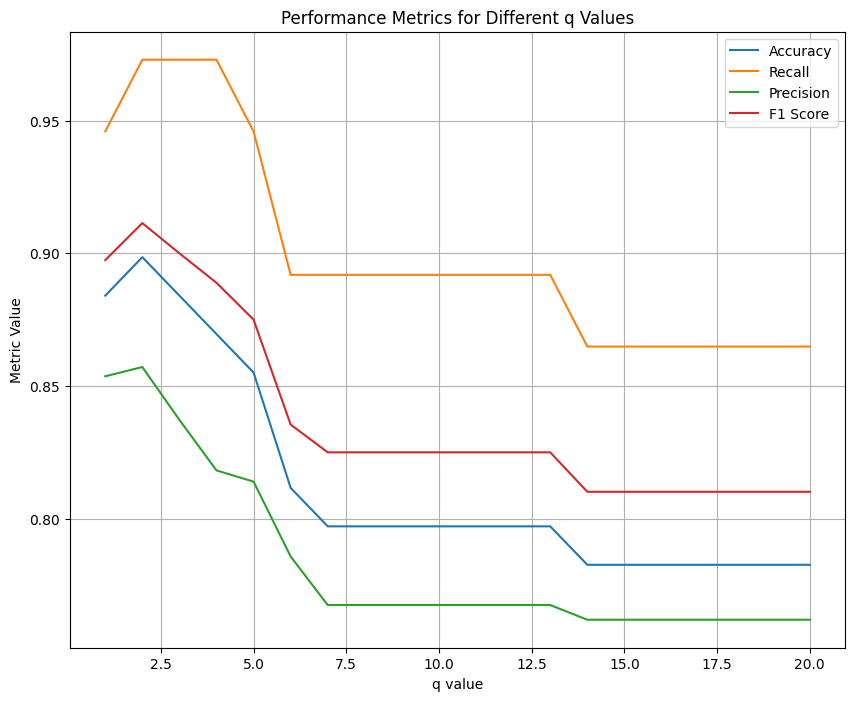

In [ ]:
# Prepare to iterate over q values and collect metrics
results = {'q': [], 'accuracy': [], 'recall': [], 'precision': [], 'f1': []}
for q in range(1, 21):
    predictions = classify_nearest_neighbour(sonar_train_df, sonar_test_df, q)
    metrics = evaluate_metrics(sonar_test_df['Class'], predictions)

    # Store results for plotting
    results['q'].append(q)
    results['accuracy'].append(metrics['accuracy'])
    results['recall'].append(metrics['recall'])
    results['precision'].append(metrics['precision'])
    results['f1'].append(metrics['f1'])

# Plot the results
plt.figure(figsize=(10, 8))
plt.plot(results['q'], results['accuracy'], label='Accuracy')
plt.plot(results['q'], results['recall'], label='Recall')
plt.plot(results['q'], results['precision'], label='Precision')
plt.plot(results['q'], results['f1'], label='F1 Score')
plt.xlabel('q value')
plt.ylabel('Metric Value')
plt.title('Performance Metrics for Different q Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Find the highest accuracy achieved across all q values tested
best_accuracy = max(results['accuracy'])
# Determine the q value that corresponds to this highest accuracy by matching the index
best_q = results['q'][results['accuracy'].index(best_accuracy)]
# Print out the best accuracy and the q value it was achieved with
print(f"The best accuracy is {best_accuracy}, achieved with q = {best_q}.")

The best accuracy is 0.8985507246376812, achieved with q = 2.
